# SUPPORT VECTOR MACHINE

Let's create the  fake income / age clustered data that we used for our K-Means clustering example:

In [12]:
import numpy as np
def createData(n,k):
    np.random.seed(1234)
    point=float(n)/k
    x=[]
    y=[]
    for i in range(k):
        incomeCentroid=np.random.uniform(20000.0,200000.0)
        ageCentroid=np.random.uniform(20.0,70.0)
        for j in range(int(point)):
            x.append([np.random.normal(incomeCentroid,10000.0),np.random.normal(ageCentroid,2.0)])
            y.append(i)
            
    x = np.array(x)
    y = np.array(y)
    return x, y    

Creating scatter plot of data created and visualising it without scaling and with scaling

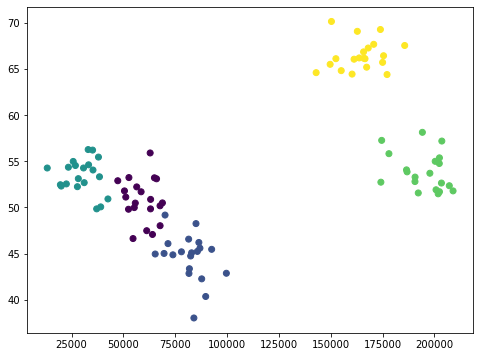

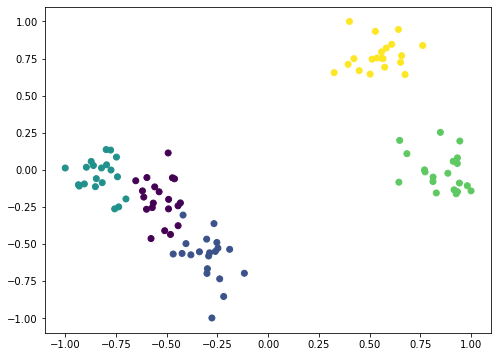

In [13]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0],X[:,1],c=y.astype(np.float)) 
plt.show()

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

importing svm using suitable kernels

In [23]:
from sklearn import svm , datasets
C=1.0
svc=svm.SVC(kernel='linear',C=C).fit(X,y)

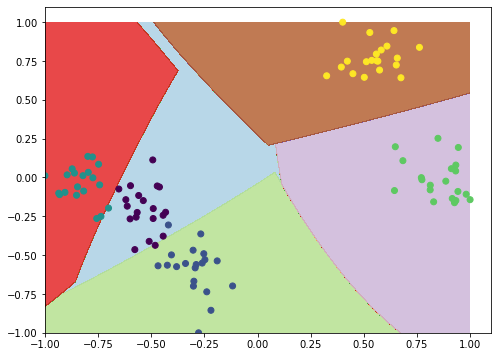

In [24]:
def plotPredictions(clf):
    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))
    
    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Convert to a list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]
    
    # Generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Draw the contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points
    plt.show()
    
plotPredictions(svc)